In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

plt.style.use("dark_background")

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
classes = np.unique(y)

X[:2], y[:2], target_names

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2]]),
 array([0, 0]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [3]:
mean_overall = np.mean(X, axis=0)

In [4]:
Sw = np.zeros((X.shape[1], X.shape[1])) # Within-class scatter
Sb = np.zeros((X.shape[1], X.shape[1])) # Between-class scatter

for c in classes:
    X_c = X[y == c]                # samples of class c
    mean_c = np.mean(X_c, axis=0)  # mean vector of class c

    # Within-class scatter
    Sw += (X_c - mean_c).T @ (X_c - mean_c)

    # Between-class scatter
    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).reshape(-1, 1)
    Sb += n_c * (mean_diff @ mean_diff.T)

In [5]:
# Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eigh(np.linalg.inv(Sw) @ Sb)

# Sort eigenvalues & eigenvectors (descending order)
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_idx]
eigen_vectors = eigen_vectors[:, sorted_idx]

eigen_values, eigen_vectors

(array([ 48.64151119,   3.55392377,  -7.08180558, -12.63630914]),
 array([[ 0.2539685 , -0.37842983,  0.77159596,  0.44376856],
        [-0.12254813,  0.89258491,  0.42332075,  0.09525583],
        [ 0.72591063,  0.23999316, -0.40814427,  0.49887403],
        [ 0.62732425,  0.04986302,  0.24260558, -0.73832276]]))

In [6]:
# Explained variance
explained_variance_ratio = eigen_values / np.sum(eigen_values)
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Eigenvalues:", eigen_values)
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)

Eigenvalues: [ 48.64151119   3.55392377  -7.08180558 -12.63630914]
Explained Variance Ratio: [ 1.49770704  0.10942786 -0.21805388 -0.38908103]
Cumulative Variance: [1.49770704 1.6071349  1.38908103 1.        ]


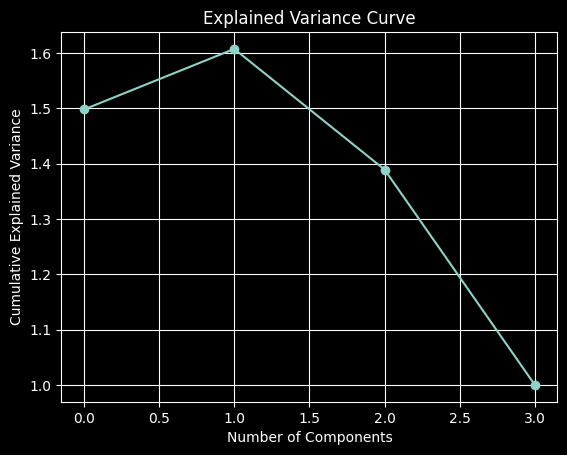

In [7]:
# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance Curve")
plt.grid()
plt.show()

In [8]:
# Project data to 2D (take top 2 eigenvectors)
W = eigen_vectors[:, :2]
X_lda = X @ W

X_lda[:2]

array([[2.00806064, 1.54001806],
       [2.018541  , 1.16941157]])

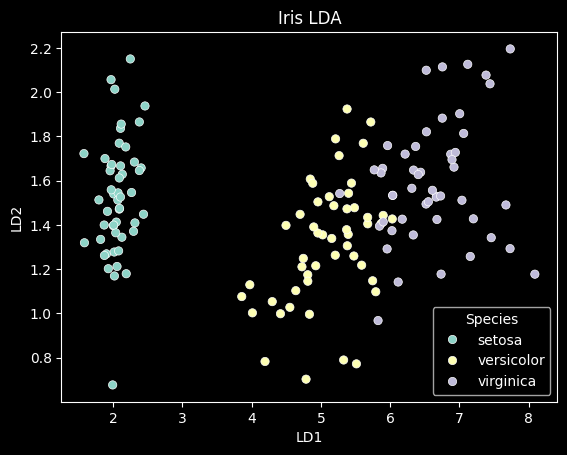

In [10]:
species_names = np.array([iris.target_names[i] for i in y])

sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=species_names)
plt.title("Iris LDA")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title="Species")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_lda_train, X_lda_test, _, _ = train_test_split(X_lda, y, test_size=0.2, random_state=99)

# Decision Tree on original data
clf = DecisionTreeClassifier(random_state=99)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Decision Tree on PCA-reduced data
clf_lda = DecisionTreeClassifier(random_state=99)
clf_lda.fit(X_lda_train, y_train)
y_pred_lda = clf_lda.predict(X_lda_test)

# Evaluation
print("Original Data:")
print("  Accuracy :", accuracy_score(y_test, y_pred))
print("  Precision:", precision_score(y_test, y_pred, average="macro"))

print("\nLDA-Reduced Data:")
print("  Accuracy :", accuracy_score(y_test, y_pred_lda))
print("  Precision:", precision_score(y_test, y_pred_lda, average="macro"))

Original Data:
  Accuracy : 0.9333333333333333
  Precision: 0.9388888888888888

LDA-Reduced Data:
  Accuracy : 0.9666666666666667
  Precision: 0.9743589743589745
